Data Analytics: Machine Learning

# Section 1: Abstract

This project will explore the data set student_data.csv which will aim to predict whether or not students currently enrolled at a University will either Graduate, Drop Out or are still enrolled at the University based on a machine learning classification analysis from a selection of 37 attributes

In [ ]:
#package importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, preprocessing
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from bokeh.palettes import Category20c
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
from bokeh.plotting import figure, show, gridplot
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool
filterwarnings('ignore')
import sqlite3
import csv
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral11

#To prevent columns from tables going to a new line in output console
pd.options.display.width = 0






# Section 2: Data Importing and Cleaning


# 2.1 Data sanity checks

In [ ]:
Studentdf = pd.read_csv("student_data.csv")
Studentdf.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,3
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,3
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,3


In [ ]:
Studentdf.shape

(4424, 37)

In [ ]:
Studentdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
Studentdf.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mother's qualification', 'Father's qualification', 'Mother's occupation',
       'Father's occupation', 'Admission grade', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without

In [ ]:
Studentdf.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [ ]:
#Dropping any duplicate values
#There are no columns to be removed prior to initial application of machine learning techniques
Studentdf.drop_duplicates()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,3
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,3
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,3
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,3


In [ ]:
#Checking for null values in our data sets, there should be none so no need to fill NA
Studentdf.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# 2.2 Analysing distribution of target variable and attributes





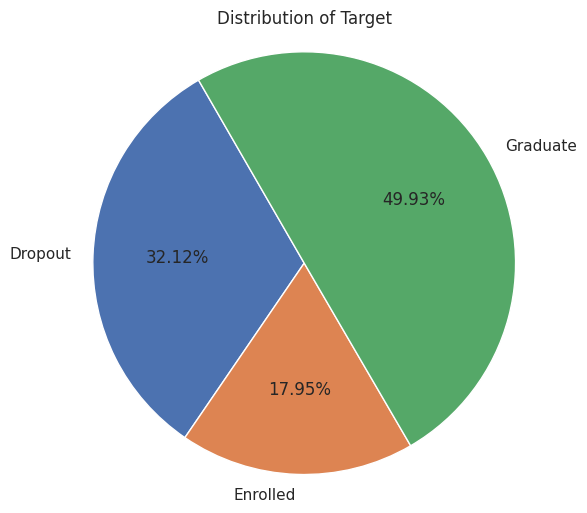

In [ ]:
#Matplotlib plot 1

#First we investigate how our target variable is distributed
#It appears that ~50% of the students graduated, ~32% have dropped out and ~18% are still enrolled
count_data = Studentdf.groupby(["Target"]).size()

labels = ["Dropout","Enrolled","Graduate"]
counts = count_data.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=120)

# Add a title
plt.title("Distribution of Target")

# Display the pie chart
plt.axis('equal')
plt.show()

In [ ]:
#Splitting of our feature and target variable
X = Studentdf.iloc[:,0:36] #Features
Y = Studentdf.iloc[:,36] #Target Variable


In [ ]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
Y

0       1
1       3
2       1
3       3
4       3
       ..
4419    3
4420    1
4421    1
4422    3
4423    3
Name: Target, Length: 4424, dtype: int64

In [ ]:
# Fit the model on 20% test 80% train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=19)



# 2.3 Random Forest for feature importance


In [ ]:
#Random forests are an ensemble learning method so it might seem premature to perform it this early
#However the reason I am utilising it now is for a secondary benefit, random forests have a method that ranks features by importance
#I have 36 atributes in X originally and with feature importance I will be able to cut the least useful attributes from our analysis
randomforest = RandomForestRegressor(
             random_state = 10, n_estimators=500,
             min_samples_leaf = 2, max_depth = 8,
             max_features ='log2')

randomforest.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, max_features='log2', min_samples_leaf=2,
                      n_estimators=500, random_state=10)

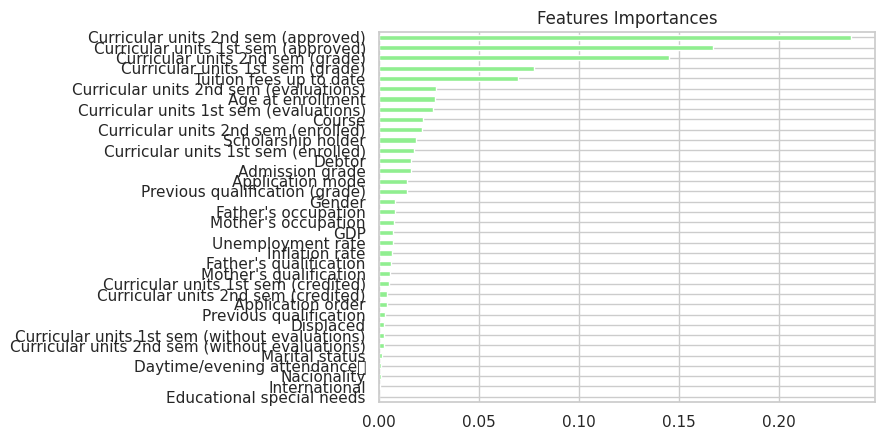

In [ ]:
#Matplotlib plot 2

# Create a pd.Series of features importances
importances = pd.Series(data=randomforest.feature_importances_,
                        index= X.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()


#Top 10 features as ranked by our random forest will now be the only attributes our models have with the less useful "noise" discarded
X = Studentdf[['Curricular units 2nd sem (approved)','Tuition fees up to date','Curricular units 2nd sem (grade)','Curricular units 2nd sem (enrolled)',
                          'Curricular units 1st sem (approved)','Course','Curricular units 1st sem (grade)',
                          'Curricular units 2nd sem (evaluations)','Curricular units 1st sem (evaluations)','Age at enrollment']]

# 2.4 Heatmap correlation of top 10 attributes

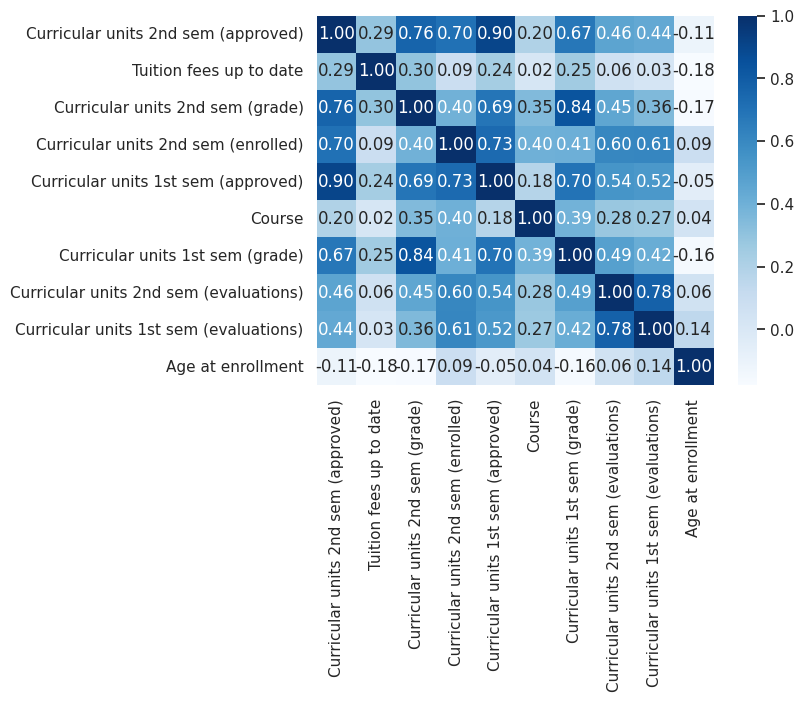

In [ ]:
#Seaborn plot 1

#showing how each feature relates to the others, rounded to 2 decimal places for legibility
sns.heatmap(X.corr(), annot=True, cmap='Blues',fmt='.2f');

# 2.5 Hyperparameter tuning function




In [ ]:
#I will be using hyperparameter tuning often in the next few sections so I will make a function to perform it on the classifier objects
def hyperparam_tuning(classifier, param_grid, X_train, y_train):

    # Initialize GridSearchCV with the classifier, parameters, scoring system (I picked neg_mean_squared_error after testing) and cross-validation settings
    grid_search = GridSearchCV(classifier, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    #train the model
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    return best_params

# 2.6 Demonstrating SQL to clean data

In [ ]:
#Drop table code for testing
cursor.execute('''DROP TABLE IF EXISTS student_data''')

# I included this code segment to show retrieving/sanitising data using SQL as a learning milestone
connection = sqlite3.connect("student_data.db")
cursor = connection.cursor()

create_table = '''CREATE TABLE student_data (
                Curricular_units_2nd_sem_approved INTEGER NOT NULL,
                Tuition_fees_up_to_date INTEGER NOT NULL,
                Curricular_units_2nd_sem_grade INTEGER NOT NULL,
                Curricular_units_1st_sem_approved INTEGER NOT NULL,
                Course INTEGER NOT NULL,
                Curricular_units_2nd_sem_enrolled INTEGER NOT NULL,
                Curricular_units_1st_sem_grade INTEGER NOT NULL,
                Curricular_units_2nd_sem_evaluations INTEGER NOT NULL,
                Curricular_units_1st_sem_evaluations INTEGER NOT NULL,
                Age_at_enrollment INTEGER NOT NULL,
                Target INTEGER NOT NULL
                );'''

cursor.execute(create_table)
#Using file with only top 10 attributes for clarity
file = open('student_data_short.csv')
contents = csv.reader(file)

insert_records = "INSERT INTO student_data (Curricular_units_2nd_sem_approved, Tuition_fees_up_to_date, Curricular_units_2nd_sem_grade, Curricular_units_1st_sem_approved, Course, Curricular_units_2nd_sem_enrolled, Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_evaluations, Curricular_units_1st_sem_evaluations,Age_at_enrollment, Target) VALUES (?, ?, ?, ?,?,?,?,?,?,?,?)"
cursor.executemany(insert_records, contents, )

select_all = "SELECT * FROM student_data"
rows = cursor.execute(select_all).fetchall()

#Examples of data sanity checks
connection.execute("DELETE FROM student_data WHERE Course='Name Unknown'")
connection.execute("DELETE FROM student_data WHERE Tuition_fees_up_to_date='Name Unknown'")
connection.execute("UPDATE student_data SET Curricular_units_2nd_sem_grade = (1) WHERE Curricular_units_2nd_sem_grade IS NULL")


cursor = connection.execute("SELECT * FROM student_data")
for r in rows:
    print(r)

clients = pd.read_sql('SELECT * FROM student_data', connection)
clients.to_csv('student_data_clean.csv', index=False)

connection.close()

('\ufeffTuition fees up to date', 'Course', 'Age at enrollment', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Target')
(1, 171, 20, 0, 0, 0, 0, 0, 0, 0, 1)
(0, 9254, 19, 6, 6, 14, 6, 6, 6, 13.66666667, 3)
(0, 9070, 19, 0, 0, 0, 6, 0, 0, 0, 1)
(1, 9773, 20, 8, 6, 13.42857143, 6, 10, 5, 12.4, 3)
(1, 8014, 45, 9, 5, 12.33333333, 6, 6, 6, 13, 3)
(1, 9991, 50, 10, 5, 11.85714286, 5, 17, 5, 11.5, 3)
(1, 9500, 18, 9, 7, 13.3, 8, 8, 8, 14.345, 3)
(0, 9254, 22, 5, 0, 0, 5, 5, 0, 0, 1)
(1, 9238, 21, 8, 6, 13.875, 6, 7, 6, 14.14285714, 3)
(0, 9238, 18, 9, 5, 11.4, 6, 14, 2, 13.5, 1)
(1, 9670, 18, 6, 6, 12.33333333, 6, 7, 5, 14.2, 3)
(1, 9500, 18, 8, 7, 13.21428571, 8, 8, 7, 13.21428571, 3)
(1, 9853, 19, 6, 0, 0, 6, 0, 0, 0, 1)
(1, 9254, 21, 7, 6, 10.57142857, 6, 8, 5, 11,

#  Section 3: Initialisation of machine learning models

# 3.1 Logistic Regression model

In [ ]:
#Training a model on logistic regression as a starting point
base_model = LogisticRegression()
base_model.fit(X_train, y_train)
y_predict = base_model.predict(X_test)
model_score = base_model.score(X_test, y_test)

print('Confusion matrix: \n',metrics.confusion_matrix(y_test, y_predict,normalize ='true'))

Confusion matrix: 
 [[0.69291339 0.02755906 0.27952756]
 [0.18404908 0.11656442 0.6993865 ]
 [0.06623932 0.01282051 0.92094017]]


In [ ]:
#Model's overall accuracy score
#we can see from the above confusion nmatrix our accuracy is being dragged down a lot by our models accuracy for our smallest instance target variable; Enrolled
#This means Accuracy is not currently a good predictor for our model, we must improve it
base_model_score = base_model.score(X_test, y_test)
print('Accuracy score is: ',base_model_score)

Accuracy score is:  0.7073446327683616


# 3.2 Dimension Scaling of Logistic Regression

In [ ]:
# scale all the columns of the Student_df. This will produce a numpy array
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [ ]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train, y_train)

y_predict = model_scaled.predict(X_test)
model_scaled_accuracy = model_scaled.score(X_test, y_test)
print('Accuracy score is: ',model_scaled_accuracy)


#We can see from the below confusion matrix that scaling our columns has given us an overall 8% boost to our models prediction accuracy,
#Also, our models accuracy on enrolled students increased more than double
print('Confusion matrix: \n',metrics.confusion_matrix(y_test, y_predict,normalize ='true'))

Accuracy score is:  0.7875706214689265
Confusion matrix: 
 [[0.81889764 0.08267717 0.0984252 ]
 [0.28834356 0.34355828 0.36809816]
 [0.03205128 0.04273504 0.92521368]]


3.2.1 Step line plot of base model and scaled model

In [ ]:
#Bokeh plot 1

#Code block to output a bokeh step line grid plot. If you zoom in you can see how each decision affected the running accuracy of each model
running_accuracies_scaled = []
running_accuracies_base = []

for i in range(len(X_test)):
    y_pred = model_scaled.predict(X_test[:i + 1])

    # Compute scaled accuracy score and store in the array
    accuracy = accuracy_score(y_test[:i + 1], y_pred)
    running_accuracies_scaled.append(accuracy)

p = figure(title='Running Accuracy Scaled Model', x_axis_label='Step', y_axis_label='Accuracy',tools=["pan", "box_zoom", "reset"])

p.step(x=np.arange(len(running_accuracies_scaled)), y=running_accuracies_scaled, line_width=2, mode='before')


for i in range(len(X_test)):
    y_pred = base_model.predict(X_test[:i + 1])

    # Compute base accuracy score and store in the array
    accuracy = accuracy_score(y_test[:i + 1], y_pred)
    running_accuracies_base.append(accuracy)

q = figure(title='Running Accuracy Base Model', x_axis_label='Step', y_axis_label='Accuracy',tools=["pan", "box_zoom", "reset"])

q.step(x=np.arange(len(running_accuracies_base)), y=running_accuracies_base, line_width=2, mode='before')

grid = gridplot([[p, q]])

output_notebook()
show(grid)

# 3.3 Decision Tree

In [ ]:
# Creating the classifier object, this will be used as a control after hyperparameter tuning
clf_test = DecisionTreeClassifier()


# Performing training
clf_test.fit(X_train, y_train)

#parameters to be passed into hyperparameter tuning function
params = {'random_state':[1,2,3,4,5,6],
              'max_depth':[2,4,6,8,10,12],
             'min_samples_leaf':[1,2,3,4,5],
             'criterion': ['gini','entropy']}

#printing out results of tune_classifier_hyperparameters
print("Best hyperameters for this model: \n",hyperparam_tuning(clf_test,params,X_train,y_train))

Best hyperameters for this model: 
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'random_state': 6}


In [ ]:
#Instantiating our decision Tree Classifier with the best hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 1,max_depth=6, min_samples_leaf=3)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, random_state=1)

In [ ]:
# Predicton on test with giniIndex
y_pred_gini = clf_gini.predict(X_test)

# Predicton on test with the control decision tree
y_pred_test = clf_test.predict(X_test)


In [ ]:
Gini_matrix = metrics.confusion_matrix(y_test, y_pred_gini,normalize ='true')

#Results for giniIndex
print("Gini Confusion Matrix: \n", Gini_matrix)

gini_accuracy = accuracy_score(y_test,y_pred_gini)
print("\n Gini Accuracy : ", gini_accuracy)

print("\nReport : ", classification_report(y_test, y_pred_gini))

Gini Confusion Matrix: 
 [[0.69685039 0.13779528 0.16535433]
 [0.19018405 0.43558282 0.37423313]
 [0.03632479 0.04059829 0.92307692]]

 Gini Accuracy :  0.768361581920904

Report :                precision    recall  f1-score   support

           1       0.79      0.70      0.74       254
           2       0.57      0.44      0.49       163
           3       0.81      0.92      0.86       468

    accuracy                           0.77       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.76      0.77      0.76       885



In [ ]:
#Results for control

Control_matrix = metrics.confusion_matrix(y_test, y_pred_test,normalize ='true')
print("Control Confusion Matrix: \n",Control_matrix)

control_accuracy = accuracy_score(y_test,y_pred_test)

print("\n Control Accuracy : ", control_accuracy)

print("\nReport : ", classification_report(y_test, y_pred_test))

#The model trained with hyperparameter tuning has 10% better accuracy than the one without tuning

Control Confusion Matrix: 
 [[0.74409449 0.12598425 0.12992126]
 [0.3190184  0.35582822 0.32515337]
 [0.10470085 0.13247863 0.76282051]]

 Control Accuracy :  0.6824858757062147

Report :                precision    recall  f1-score   support

           1       0.65      0.74      0.69       254
           2       0.38      0.36      0.37       163
           3       0.81      0.76      0.78       468

    accuracy                           0.68       885
   macro avg       0.61      0.62      0.62       885
weighted avg       0.68      0.68      0.68       885



3.3.1 Null Hypothesis comparison

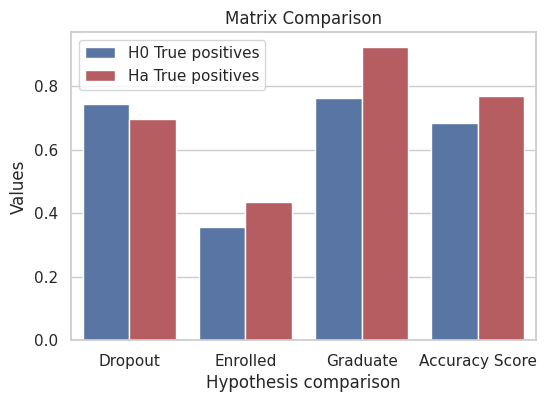

In [ ]:
#Seaborn plot 2

# Only selecting true positives as the other cells are irrelevant
values_matrix1 = [Control_matrix[0, 0], Control_matrix[1, 1], Control_matrix[2, 2], control_accuracy]
values_matrix2 = [Gini_matrix[0, 0], Gini_matrix[1, 1], Gini_matrix[2, 2], gini_accuracy]

labels = ['Dropout', 'Enrolled', 'Graduate', 'Accuracy Score']

# Combine the data into a DataFrame
data = {
    'Label': labels * 2,
    'Values': values_matrix1 + values_matrix2,
    'Matrix': ['H0 True positives'] * len(labels) + ['Ha True positives'] * len(labels)
}

df = pd.DataFrame(data)

# Create a Seaborn plot no.3
plt.figure(figsize=(6, 4))
sns.barplot(x='Label', y='Values', hue='Matrix', data=df, palette={'H0 True positives': 'b', 'Ha True positives': 'r'})

plt.xlabel('Hypothesis comparison')
plt.ylabel('Values')
plt.title('Matrix Comparison')
plt.legend()

plt.show()

# 3.4 K nearest neighbours Classifier

In [ ]:
#Instantiate KNN with arbitrary starting value of 3
knn = KNN(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7344632768361582


In [ ]:
#Bokeh plot 2

#Testing to see which value of k provides the best accuracy
k_values = [i for i in range (1,20)]
scores = []
for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred)
    scores.append(np.mean(knn_accuracy))

# Create a Bokeh plot
output_notebook()

source = ColumnDataSource(data={"k_values": k_values, "scores": scores})

hover = HoverTool(tooltips=[("k_values", "@k_values"), ("scores", "@scores")])
p = figure(width=600, height=400, title="Bokeh Scatter Plot", x_axis_label="K Values", y_axis_label="Accuracy Score",tools=[hover, "pan", "box_zoom", "reset"])

p.scatter("k_values", "scores", source=source, line_width=2, line_color="green")
p.triangle("k_values", "scores", source=source, size=8, fill_color="purple", line_color="purple")

show(p)

In [ ]:
#From our visualisation above we can see that k=14 is the most accurate value so we will redo our knn to see if it improves our score
knn = KNN(n_neighbors=14)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)

#By finding the optimal value for k not only have we increased the accuracy of our KNN model
print("KNN Accuracy:", knn_accuracy)
print("\n KNN Confusion Matrix: \n",
        metrics.confusion_matrix(y_test, y_pred,normalize ='true'))

KNN Accuracy: 0.752542372881356

 KNN Confusion Matrix: 
 [[0.72047244 0.06299213 0.21653543]
 [0.20858896 0.23312883 0.55828221]
 [0.02564103 0.02350427 0.9508547 ]]


# Section 4: Ensemble Methods

# 4.1 Bagging with hyperparameter tuning

In [ ]:
# we will attempt another ensemble learning method: Bagging

dt_bag = DecisionTreeClassifier(
             random_state = 1,
            max_depth = 6, min_samples_leaf = 3)


bag = BaggingClassifier(estimator=dt_bag, n_estimators=300,oob_score=False,n_jobs=-1)

bag.fit(X_train, y_train)

#parameters to be passed into hyperparameter tuning function
params = {'random_state':[1,2,3,4,5,6],
              'max_depth':[2,4,6,8,10,12],
             'min_samples_leaf':[1,2,3,4,5]}

#output of tune_classifier_hyperparameters
print("Best hyperameters for this model: \n",hyperparam_tuning(dt_bag,params,X_train,y_train))


y_pred = bag.predict(X_test)

# Evaluate bagging score
bag_accuracy = accuracy_score(y_test, y_pred)

print("Bagging Accuracy:", bag_accuracy)
print("\n Bagging Confusion Matrix: \n",
        metrics.confusion_matrix(y_test, y_pred,normalize ='true'))


Best hyperameters for this model: 
 {'max_depth': 6, 'min_samples_leaf': 3, 'random_state': 6}
Bagging Accuracy: 0.7875706214689265

 Bagging Confusion Matrix: 
 [[0.7519685  0.08267717 0.16535433]
 [0.2208589  0.38650307 0.39263804]
 [0.01709402 0.03632479 0.9465812 ]]


# 4.2 Ensemble learning: Boosting

In [ ]:

# Instantiate ada
ada = AdaBoostClassifier(n_estimators=300, learning_rate = 0.8, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

#parameters to be passed into hyperparameter tuning function
params = {'n_estimators':[325,300,350,250,275],
              'learning_rate':[0.3,0.8,0.7,0.4,0.6,0.9],
             'random_state':[1,5,10,15,20]}

#print output of tune_classifier_hyperparameters
print("Best hyperameters for this model: \n",hyperparam_tuning(ada,params,X_train,y_train))

# Compute the probabilities of obtaining the positive class
y_pred = ada.predict(X_test)

ada_accuracy = accuracy_score(y_test, y_pred)
# Print accuracy
print('Accuracy of Adaboost: ',(ada_accuracy))
print("\n Adaboost Confusion Matrix: \n",
        metrics.confusion_matrix(y_test, y_pred,normalize ='true'))


Best hyperameters for this model: 
 {'learning_rate': 0.7, 'n_estimators': 250, 'random_state': 1}
Accuracy of Adaboost:  0.7785310734463277

 Adaboost Confusion Matrix: 
 [[0.77165354 0.12598425 0.1023622 ]
 [0.26380368 0.41717791 0.3190184 ]
 [0.02777778 0.06410256 0.90811966]]


4.2.1 Learning curve of adaboost

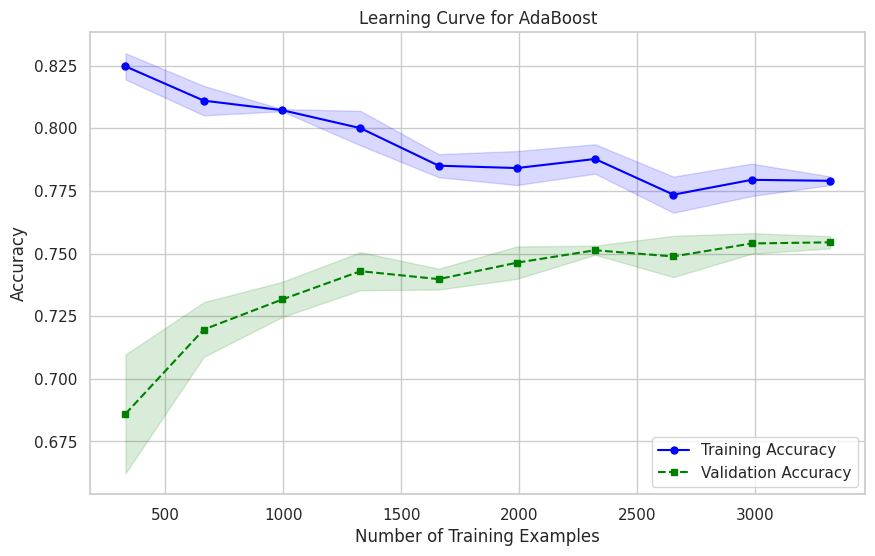

In [ ]:
#Matplotlib plot 3

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    ada, X, Y, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve for AdaBoost')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 4.3 Voting Classifier

In [ ]:
classifiers = [('model',model_scaled),
               ('AdaBoost Classifier',ada),
               ('Bagging Classifier',bag),
               ]

#Instantiating the voting classifier with weights equal to the distribution of our target variables summed to 1
vc = VotingClassifier(estimators = classifiers,weights = [0.32,0.18,0.5])

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

voting_Accuracy = accuracy_score(y_test,y_pred)

#This new model is correct between 79.1% and 80.0% of the time, we have achieved a better accuracy than all of the 3 models comprising it even if only marginally
#We can see from the confusion matrix below that correctly identifying Enrolled students is still the biggest problem for our model but it has drastically improved
print('Voting Classifier: {:.3f}'.format(voting_Accuracy))
print("Confusion Matrix: \n",
        metrics.confusion_matrix(y_test, y_pred,normalize ='true'))

Voting Classifier: 0.790
Confusion Matrix: 
 [[0.81102362 0.07480315 0.11417323]
 [0.26993865 0.37423313 0.35582822]
 [0.02777778 0.0491453  0.92307692]]


# Section 5: Summary statistics and conclusions

# 5.1 Model Progression plot

In [ ]:
#Bokeh plot 3

model_names = ["Base model","Scaled","Gini","KNN","Bagging","AdaBoost","Voting"]
model_values = [base_model_score, model_scaled_accuracy, gini_accuracy, knn_accuracy, bag_accuracy, ada_accuracy, voting_Accuracy]

output_notebook()  # Display Bokeh plot in Jupyter Notebook
colors = Category20c[len(model_names)]

source = ColumnDataSource(data={"model_names": model_names, "model_values": model_values, "colors": colors})
hover = HoverTool(tooltips=[("Model: ", "@model_names"), ("Model Accuracy: ", "@model_values")])


plot = figure(width=600, height=400, title="Bokeh Line Plot", x_range=model_names, y_axis_label="Accuracy Score",tools=[hover, "pan", "box_zoom", "reset"])

plot.line(x="model_names", y="model_values", source=source, line_width=2, line_color="blue")
plot.circle(x="model_names", y="model_values", source=source, size=12, fill_color="colors", line_color="blue")


show(plot)



# 5.2 Model summary statistic table

In [ ]:

classifiers = [base_model,model_scaled, knn, clf_gini,bag,ada,vc]
model_names = ["Logistic Regression","Scaled Regression","K-Nearest Neighbours","Decision Tree: Gini","Bagging","AdaBoost","Voting Classifier"]

results = []

for model, model_name in zip(classifiers, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = MAE(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')

    results.append([model_name, accuracy, mse, rmse, mae, precision, f1])

df = pd.DataFrame(results, columns=["Model", "Accuracy", "MSE", "RMSE", "MAE","Precision","F1 Score"])
print(df)


                  Model  Accuracy       MSE      RMSE       MAE  Precision  F1 Score
0   Logistic Regression  0.733333  0.520904  0.721737  0.351412   0.733333  0.733333
1     Scaled Regression  0.787571  0.348023  0.589934  0.257627   0.787571  0.787571
2  K-Nearest Neighbours  0.752542  0.474576  0.688895  0.323164   0.752542  0.752542
3   Decision Tree: Gini  0.768362  0.431638  0.656992  0.298305   0.768362  0.768362
4               Bagging  0.787571  0.381921  0.617997  0.268927   0.787571  0.787571
5              AdaBoost  0.778531  0.353672  0.594704  0.265537   0.778531  0.778531
6     Voting Classifier  0.789831  0.352542  0.593753  0.257627   0.789831  0.789831


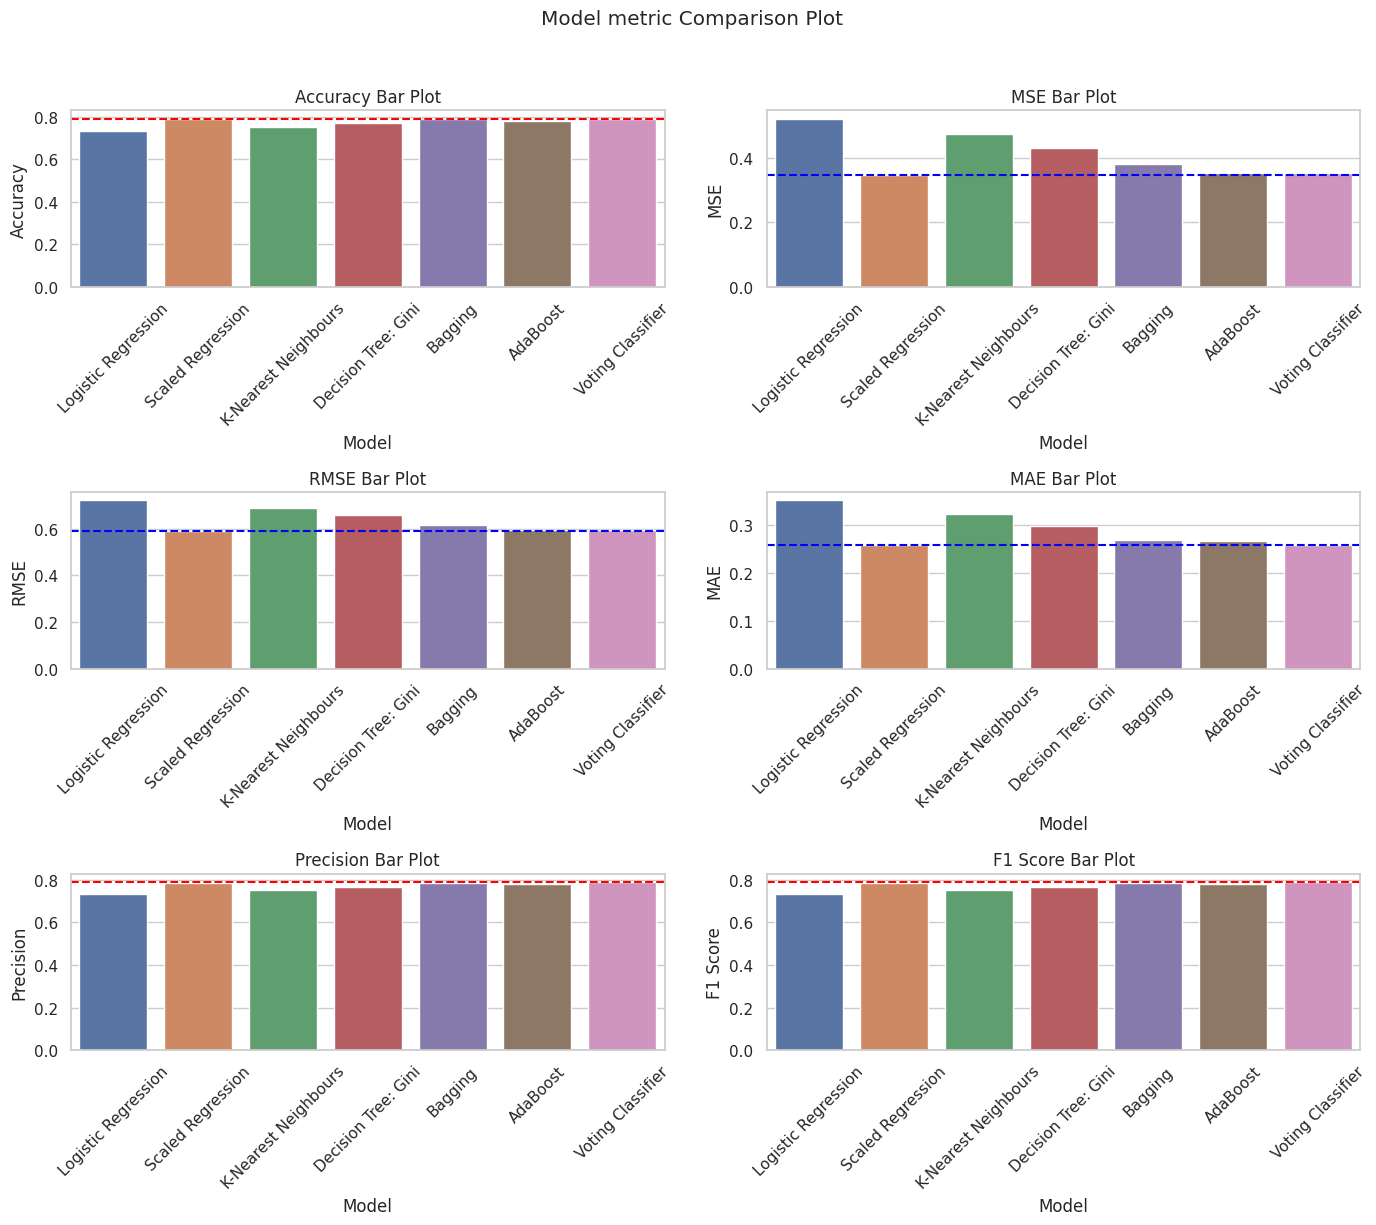

In [ ]:
#Seaborn plot 3
#code to output the results of our matrix above into bar plots
results = df

df = pd.DataFrame(results, columns=["Model", "Accuracy", "MSE", "RMSE", "MAE", "Precision", "F1 Score"])

metrics = ["Accuracy", "MSE", "RMSE", "MAE", "Precision", "F1 Score"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Model metric Comparison Plot', y=1.02)

for idx, metric in enumerate(metrics):
    row, col = divmod(idx, 2)
    sns.barplot(x='Model', y=metric, data=df, ax=axes[row, col])

    max_index = df[metric].idxmax()
    max_value = df.at[max_index, metric]

    min_index = df[metric].idxmin()
    min_value = df.at[min_index, metric]

    if metric in ["MSE", "RMSE", "MAE"]:
      min_index = df[metric].idxmin()
      min_value = df.at[min_index, metric]

      # Adds dotted line to matrices where a lower value indicates the best score (MSE, RMSE, MAE)
      axes[row, col].axhline(y=min_value, linestyle='--', color='blue', label=f'Min Value ({min_value:.2f})')
    else:
      #Adds dotted line to matrices where a higher value indicates the best score (Accuracy, Precision, F1 Score)
      axes[row, col].axhline(y=max_value, linestyle='--', color='red', label=f'Max Value ({max_value:.2f})')


    axes[row, col].set_title(f'{metric} Bar Plot')
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
